In [219]:
import warnings
warnings.filterwarnings('ignore')

In [220]:
import pandas as pd

In [ ]:
data = pd.read_csv('Expresso_churn_dataset.csv')

In [222]:
df = data.copy()

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         12000 non-null  object 
 1   REGION          11205 non-null  object 
 2   TENURE          12000 non-null  object 
 3   MONTANT         11239 non-null  float64
 4   FREQUENCE_RECH  11239 non-null  float64
 5   REVENUE         11320 non-null  float64
 6   ARPU_SEGMENT    11320 non-null  float64
 7   FREQUENCE       11320 non-null  float64
 8   ON_NET          10438 non-null  float64
 9   ORANGE          11151 non-null  float64
 10  TIGO            10770 non-null  float64
 11  MRG             12000 non-null  object 
 12  REGULARITY      12000 non-null  int64  
 13  TOP_PACK        11147 non-null  object 
 14  FREQ_TOP_PACK   11147 non-null  float64
 15  CHURN           12000 non-null  int64  
 16  DATA_VOLUME     996 non-null    float64
 17  ZONE1           147 non-null   

In [224]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,DATA_VOLUME,ZONE1,ZONE2
0,8434,9,4,6000.0,12.0,6000.0,2000.0,12.0,142.0,212.0,4.0,0,47,48,12.0,0,NaN,NaN,NaN
1,695,14,7,600.0,1.0,600.0,200.0,1.0,NaN,21.0,2.0,0,1,8,1.0,1,NaN,NaN,NaN
2,4082,14,7,3000.0,1.0,3000.0,1000.0,1.0,6.0,109.0,2.0,0,5,41,1.0,1,NaN,NaN,NaN
3,3427,0,7,16300.0,25.0,16805.0,5602.0,34.0,43.0,652.0,10.0,0,61,24,12.0,0,NaN,NaN,NaN
4,4487,4,7,650.0,2.0,449.0,150.0,3.0,6.0,8.0,2.0,0,41,51,1.0,0,NaN,NaN,NaN


In [225]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

In [226]:
duplicates = df.duplicated()
duplicates.sum()

np.int64(0)

In [227]:
df.isna().sum().sort_values(ascending=False)

ZONE2             11885
ZONE1             11853
DATA_VOLUME       11004
ON_NET             1562
TIGO               1230
TOP_PACK            853
FREQ_TOP_PACK       853
ORANGE              849
REGION              795
MONTANT             761
FREQUENCE_RECH      761
FREQUENCE           680
ARPU_SEGMENT        680
REVENUE             680
user_id               0
TENURE                0
REGULARITY            0
MRG                   0
CHURN                 0
dtype: int64

In [228]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [229]:
df['user_id'] = le.fit_transform(df['user_id'])
df['REGION'] = le.fit_transform(df['REGION'])
df['TENURE'] = le.fit_transform(df['TENURE'])
df['MRG'] = le.fit_transform(df['MRG'])
df['TOP_PACK'] = le.fit_transform(df['TOP_PACK'])

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         12000 non-null  int64  
 1   REGION          12000 non-null  int64  
 2   TENURE          12000 non-null  int64  
 3   MONTANT         11239 non-null  float64
 4   FREQUENCE_RECH  11239 non-null  float64
 5   REVENUE         11320 non-null  float64
 6   ARPU_SEGMENT    11320 non-null  float64
 7   FREQUENCE       11320 non-null  float64
 8   ON_NET          10438 non-null  float64
 9   ORANGE          11151 non-null  float64
 10  TIGO            10770 non-null  float64
 11  MRG             12000 non-null  int64  
 12  REGULARITY      12000 non-null  int64  
 13  TOP_PACK        12000 non-null  int64  
 14  FREQ_TOP_PACK   11147 non-null  float64
 15  CHURN           12000 non-null  int64  
 16  DATA_VOLUME     996 non-null    float64
 17  ZONE1           147 non-null   

In [231]:
df['CHURN'].value_counts()

CHURN
0    6615
1    5385
Name: count, dtype: int64

In [232]:
df_sample = df.dropna(subset=['REGULARITY', 'FREQ_TOP_PACK', 'ORANGE', 'TIGO', 'REGION', 'TOP_PACK'])
df_sample.shape

(10680, 19)

In [233]:
df_sample.isna().sum()

user_id               0
REGION                0
TENURE                0
MONTANT              55
FREQUENCE_RECH       55
REVENUE               0
ARPU_SEGMENT          0
FREQUENCE             0
ON_NET              823
ORANGE                0
TIGO                  0
MRG                   0
REGULARITY            0
TOP_PACK              0
FREQ_TOP_PACK         0
CHURN                 0
DATA_VOLUME       10191
ZONE1             10593
ZONE2             10621
dtype: int64

In [234]:
df_sample = df_sample.drop(columns = ['DATA_VOLUME', 'ZONE1', 'ZONE2'])

In [235]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10680 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         10680 non-null  int64  
 1   REGION          10680 non-null  int64  
 2   TENURE          10680 non-null  int64  
 3   MONTANT         10625 non-null  float64
 4   FREQUENCE_RECH  10625 non-null  float64
 5   REVENUE         10680 non-null  float64
 6   ARPU_SEGMENT    10680 non-null  float64
 7   FREQUENCE       10680 non-null  float64
 8   ON_NET          9857 non-null   float64
 9   ORANGE          10680 non-null  float64
 10  TIGO            10680 non-null  float64
 11  MRG             10680 non-null  int64  
 12  REGULARITY      10680 non-null  int64  
 13  TOP_PACK        10680 non-null  int64  
 14  FREQ_TOP_PACK   10680 non-null  float64
 15  CHURN           10680 non-null  int64  
dtypes: float64(9), int64(7)
memory usage: 1.4 MB


In [ ]:
churn_0 = df_sample[df['CHURN'] == 0]
churn_1 = df_sample[df['CHURN'] == 1]

n_per_class = 5000

churn_0_sample = churn_0.sample(n=n_per_class, random_state=42)
churn_1_sample = churn_1.sample(n=n_per_class, random_state=42)

df_sample = pd.concat([churn_0_sample, churn_1_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

df_sample.to_csv("balanced_10000.csv", index=False)

In [237]:
df_sample['CHURN'].value_counts()

CHURN
1    5000
0    5000
Name: count, dtype: int64

In [238]:
X = df_sample[['REGULARITY', 'FREQ_TOP_PACK', 'ORANGE', 'TIGO', 'REGION', 'TOP_PACK']]
y = df_sample['CHURN']

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 


In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.8868570770239793


In [245]:
model = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200,
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [246]:
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      1539
           1       0.86      0.92      0.89      1461

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000


Confusion Matrix:
 [[1324  215]
 [ 114 1347]]


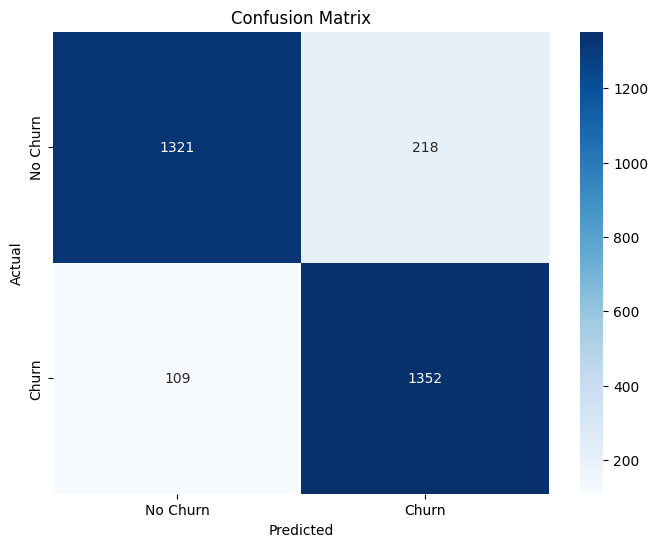

In [243]:
#ploting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [244]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("model.pkl", "rb") as f:
    model = pickle.load(f)
